In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
swed_df = pd.read_csv("swedish_insurance.csv")

In [3]:
swed_df

,X,Y
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4
...,...,...
58,9,87.4
59,31,209.8
60,14,95.5
61,53,244.6


Text(0, 0.5, 'y')

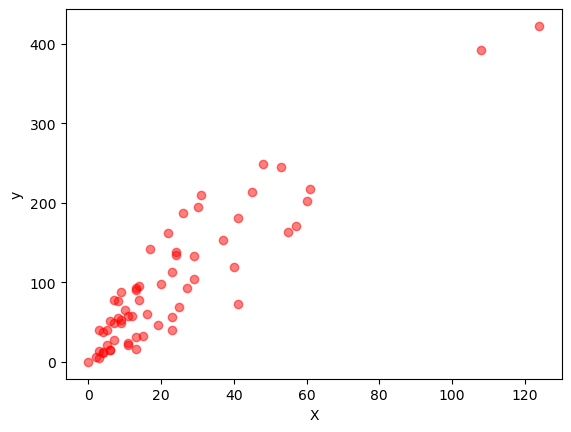

In [4]:
plt.scatter(x=[swed_df.X], y=[swed_df.Y], c = "red", alpha=0.5, marker='o')
plt.xlabel("X")
plt.ylabel("y")


In [5]:
""" Declaring hypothesis

h(x) = w0 + w1x
where w = [w0
            w1]
we need to find w0 and w1 such that it fits this curve

cost function J(w0, w1) = 1/2m Sum(h(xi) - yi) ^ 2 - least square method 
 X is a matrix, y is an array
 
""" 
X = np.matrix(swed_df)
y = swed_df.Y
m = 62
def h(X, w):
    return (w[1]*np.array(X[:,0]) + w[0])

In [6]:
# Cost function
def cost(w, X, y):
    return (.5/m) * np.sum(np.square(h(X, w)-np.array(y)))

In [7]:
#Gradient Descent
def grad(w, X, y):
    g = [0] * 2
    g[0] = (1/m) * np.sum(h(X,w) - np.array(y)) # W r t w0
    g[1] = (1/m) * np.sum((h(X,w) - np.array(y))*np.array(X[:,0])) # W r t w1
    return g

In [8]:
def descent(w_new, w_prev, lr): # lr - learning rate
    print(w_prev)
    print(cost(w_prev, X, y)) # no of iterations
    j = 0
    while True:
        w_prev = w_new
        w0 = w_prev[0] - lr*grad(w_prev, X, y)[0]
        w1 = w_prev[1] - lr*grad(w_prev, X, y)[1]
        w_new = [w0, w1]
        
        print(w_new)
        print(cost(w_new, X, y))
        
        # Terminate criterion
        if(w_new[0] - w_prev[0])**2 + (w_new[1] - w_prev[1])**2 <= pow(10, -6):
            return w_new
        if j>m:
            return w_new
        j+=1

In [9]:
# Initializing parameters
w = [0, -1]

In [10]:
w = descent(w, w, .1)
print(w)

[0, -1]
726743.0298387096
[775.1845161290323, 21189.890967741936]
15273835312641.818
[-3110577.718598335, -144040931.14034027]
7.054535254792303e+20
[21137152779.874485, 978917559625.8108]
3.258282544145277e+28
[-143650330245633.75, -6652827849414638.0]
1.5049049659607165e+36
[9.762629224490778e+17, 4.521332563468957e+19]
6.950713837394723e+43
[-6.634786652663349e+21, -3.072745697347825e+23]
3.210330482131695e+51
[4.509071574277277e+25, 2.0882706564998727e+27]
1.4827573175371736e+59
[-3.0644129986898305e+29, -1.4192109482286167e+31]
6.848420357178187e+66
[2.0826076658684103e+33, 9.645108546168435e+34]
3.163084129405197e+74
[-1.4153623195660091e+37, -6.5549183497692226e+38]
1.4609356154968159e+82
[9.618952856451497e+40, 4.454792226180814e+42]
6.747632327529687e+89
[-6.53714266485539e+44, -3.0275241764284823e+46]
3.1165331000600093e+97
[4.442711681657789e+48, 2.0575376299237823e+50]
1.4394350628949447e+105
[-3.019314109886449e+52, -1.3983244565024465e+54]
6.6483275927712005e+112
[2.05195

C:\Users\Vrushank R Rao\AppData\Local\Temp\ipykernel_20048\120415643.py:3: RuntimeWarning: overflow encountered in square
  return (.5/m) * np.sum(np.square(h(X, w)-np.array(y)))
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\Vrushank R Rao\AppData\Local\Temp\ipykernel_20048\3282183180.py:15: RuntimeWarning: overflow encountered in double_scalars
  if(w_new[0] - w_prev[0])**2 + (w_new[1] - w_prev[1])**2 <= pow(10, -6):


ValueError: x and y must be the same size

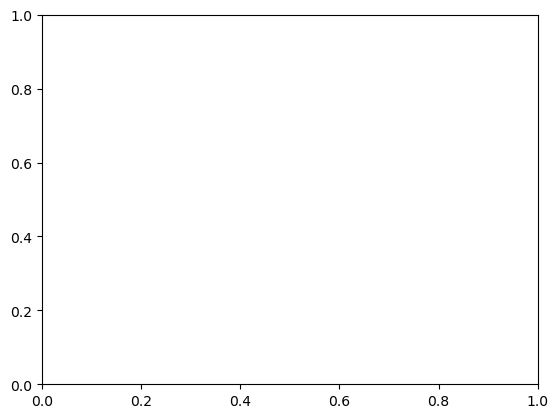

In [11]:
def graph(formula, x_range):  
    x = np.array(x_range)  
    y = formula(x)  
    plt.plot(x, y)  
    
def my_formula(x):
    return w[0]+w[1]*x

plt.scatter(X,y, c = "red",alpha=.5, marker = 'o')
graph(my_formula, range(-5,5))
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [ ]:
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=200, n_features=1, n_informative=1, noise=6, bias=30, random_state=200)
m = 200

In [ ]:
from matplotlib import pyplot as plt
plt.scatter(X,y, c = "red",alpha=.5, marker = 'o')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()